In [11]:
# import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Importing dataset:

Since data is in form of csv file we have to use pandas read_csv to load the data
After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
Check whether any null values are there or not. if it is present then following can be done,
1. Imputing data using Imputation method in sklearn
2. Filling NaN values with mean, median and mode using fillna() method

Describe data: Statistical analysis

In [12]:
# Load the data
df = pd.read_csv('New_data_Set.csv')
# print the first 5 rows of the data
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [3]:
# get the number of rows and columns
df.shape

(5000, 20)

In [4]:
# get the data set details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [5]:
# get the count of the empty values for each column
df.isna().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [9]:
# get total length of dataset
len(df)

5000

In [6]:
# calculate null values percentage in the data set
sum(df.isna().sum())/len(df)*100

30.14

In [10]:
# get percentage of the null values for each column
# df.isnull().sum()/len(df)*100
df.isna().mean()*100

Gender             0.00
Business           0.00
Dependancies       0.00
Calls              0.00
Type               0.00
Billing            0.00
Rating             0.00
Age                0.00
Salary             0.00
Base_pay           0.46
Bonus              0.00
Unit_Price         0.00
Volume             0.00
openingbalance    29.52
closingbalance     0.00
low                0.00
Unit_Sales         0.00
Total_Sales        0.16
Months             0.00
Education          0.00
dtype: float64

<AxesSubplot:>

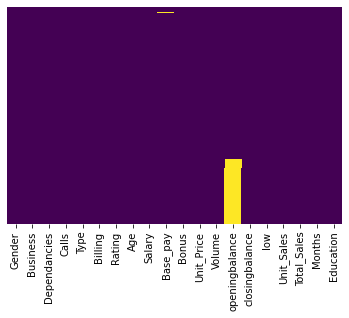

In [41]:
# create heatmap to check missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Statistical Analysis

In [16]:
# statistical summary of the data(
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


#### From the above output, Age is spread between 18 and 88 with an average of 51.86 and standard deviation of 8.56 and salary between 5089 to 199970.74 with an average of 99821.92 and standard deviation of 25376.96

In [5]:
# check skewness of feature Age
df['Age'].skew()

-0.259971462480172

In [6]:
# check skewness of Salary
df['Salary'].skew()

-0.3960415999978834

In [3]:
#check skewness of Bonus
df['Bonus'].skew()

-0.39604160012557094

In [4]:
#check skewness of Base_pay
df['Base_pay'].skew()

-0.3641947982524865

# Univariate Analysis

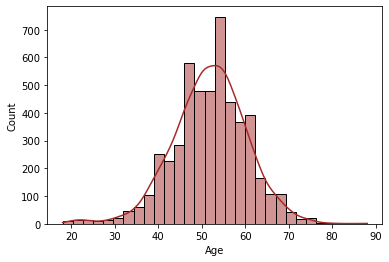

In [22]:
# check histogram chart for Age
sns.histplot(df['Age'], kde=True, color='brown', bins=30)
plt.show()

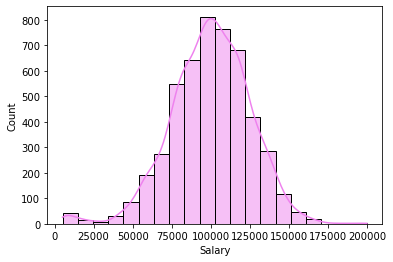

In [27]:
# check histogram chart for Salary
sns.histplot(df['Salary'], kde=True, color='violet', bins=20)
plt.show()

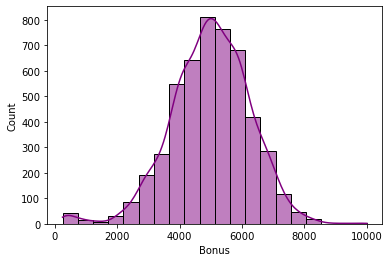

In [45]:
# check histogram chart for Bonus
sns.histplot(df['Bonus'], kde=True, color='purple', bins=20)
plt.show()

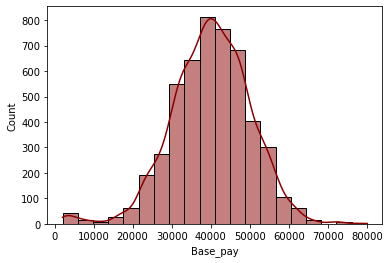

In [57]:
# check histogram chart for Base pay
sns.histplot(df['Base_pay'].dropna(), kde=True, color='darkred', bins=20)
plt.show()

#### From the above figures Age is dense around 48 to 52 and Salary is between 80K to 125K, Bonus is between 4k to 6k and Base pay is desnse around 30k to 50k

# Handling Categorical Data

In [17]:
# print all of the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('----------------------------------------------------')

Gender : ['Female' 'Male']
Male      2528
Female    2472
Name: Gender, dtype: int64
----------------------------------------------------
Dependancies : ['No' 'Yes']
No     3524
Yes    1476
Name: Dependancies, dtype: int64
----------------------------------------------------
Calls : ['Yes' 'No']
Yes    4539
No      461
Name: Calls, dtype: int64
----------------------------------------------------
Type : ['Month-to-month' 'Two year' 'One year']
Month-to-month    2777
Two year          1195
One year          1028
Name: Type, dtype: int64
----------------------------------------------------
Billing : ['No' 'Yes']
Yes    2956
No     2044
Name: Billing, dtype: int64
----------------------------------------------------
Rating : ['Yes' 'No']
No     3682
Yes    1318
Name: Rating, dtype: int64
----------------------------------------------------
Total_Sales : ['18.8' '18.85' '18.9' ... '8672.45' '8684.8' ' ']
           8
19.75      6
20.2       6
20.15      6
19.45      6
          ..
653.9    

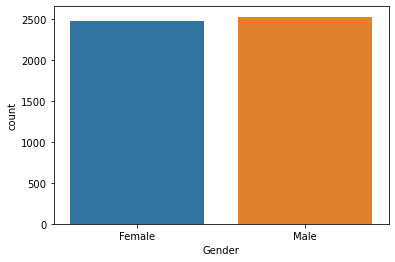

In [36]:
# check the Gender count by using bar graph
sns.countplot(x='Gender', data=df)
plt.show()

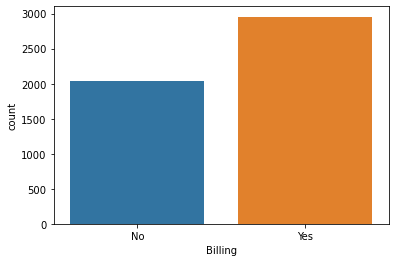

In [50]:
# check the employee subscribe to billing plans or no
sns.countplot(x='Billing', data=df)
plt.show()

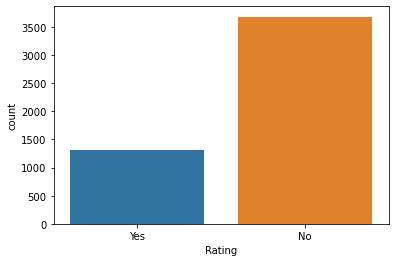

In [51]:
# check if the employees has been given a rating by a superior or no
sns.countplot(x='Rating', data=df)
plt.show()

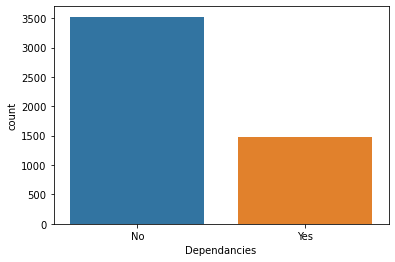

In [65]:
# check if the number of people dependant on the employee
sns.countplot(x='Dependancies', data=df)
plt.show()

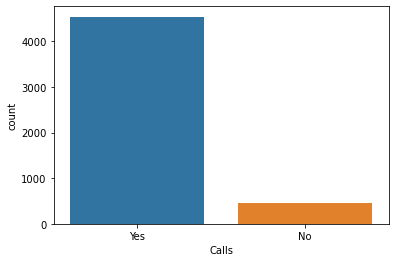

In [66]:
# check if the employee has authority to make calls or not
sns.countplot(x='Calls', data=df)
plt.show()

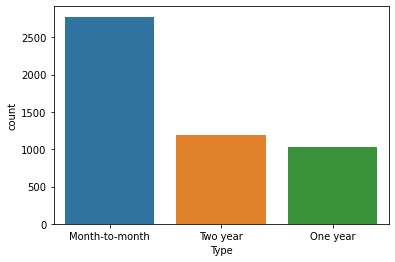

In [156]:
# check if the employee salary settlement type
sns.countplot(x='Type', data=df)
plt.show()

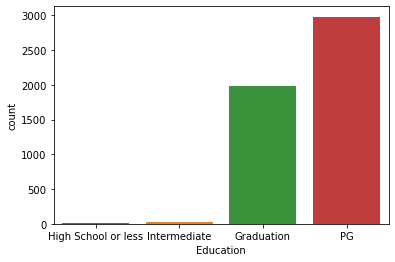

In [157]:
# check if the employee Education background
sns.countplot(x='Education', data=df)
plt.show()

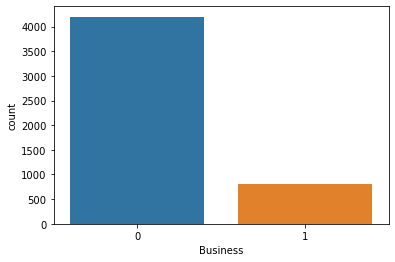

In [28]:
# check the employee has a business or not by bar graph
sns.countplot(x='Business', data=df)
plt.show()

In [18]:
# Get the count if the employee has the business or no
df['Business'].value_counts()

0    4200
1     800
Name: Business, dtype: int64

In [13]:
# convert data type from object to float for Total Sales
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors='coerce')

In [20]:
# data set information about null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

In [14]:
# defining function to impute missing data for variable
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [16]:
# calculate median for openingbalance
median=df.openingbalance.median()
median

33.119999

In [17]:
# calculate median for Base pay
median=df.Base_pay.median()
median

40282.01604

In [18]:
# calculate median for Total Sales
median=df.Total_Sales.median()
median

1395.65

In [19]:
# assigning impute function to create new column for openingbalance
impute_nan(df,'openingbalance',median)

In [20]:
# assigning impute function to create new column for Base_pay
impute_nan(df,'Base_pay',median)

In [21]:
# assigning impute function to create new column for Total_Sales
impute_nan(df,'Total_Sales',median)

In [22]:
# check the standard deviation for both original and imputed column
print(df['openingbalance'].std())
print(df['openingbalance_median'].std())

38.3614973839399
617.4692513011614


In [23]:
# check the standard deviation for both original and imputed column
print(df['Base_pay'].std())
print(df['Base_pay_median'].std())

10135.686074597432
10445.142541116757


In [24]:
# check the standard deviation for both original and imputed column
print(df['Total_Sales'].std())
print(df['Total_Sales_median'].std())

2267.7174353303058
2264.626949931423


In [25]:
# dropping openingbalance, Total Sales, Base pay columns from data frame
df.drop('Base_pay', axis=1, inplace=True)
df.drop('Total_Sales', axis=1, inplace=True)
df.drop('openingbalance', axis=1, inplace=True)

In [32]:
# check the data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 5000 non-null   object 
 1   Business               5000 non-null   int64  
 2   Dependancies           5000 non-null   object 
 3   Calls                  5000 non-null   object 
 4   Type                   5000 non-null   object 
 5   Billing                5000 non-null   object 
 6   Rating                 5000 non-null   object 
 7   Age                    5000 non-null   int64  
 8   Salary                 5000 non-null   float64
 9   Bonus                  5000 non-null   float64
 10  Unit_Price             5000 non-null   float64
 11  Volume                 5000 non-null   int64  
 12  closingbalance         5000 non-null   float64
 13  low                    5000 non-null   float64
 14  Unit_Sales             5000 non-null   float64
 15  Mont

In [33]:
# checking missing data
df.isna().sum()

Gender                   0
Business                 0
Dependancies             0
Calls                    0
Type                     0
Billing                  0
Rating                   0
Age                      0
Salary                   0
Bonus                    0
Unit_Price               0
Volume                   0
closingbalance           0
low                      0
Unit_Sales               0
Months                   0
Education                0
openingbalance_median    0
Base_pay_median          0
Total_Sales_median       0
dtype: int64

In [26]:
# check the statistics of the data set
df.describe()

,Business,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Months,openingbalance_median,Base_pay_median,Total_Sales_median
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.00000
mean,0.160000,51.865000,99821.928553,4991.096428,51.258522,6.761260e+06,43.577828,43.034129,64.84151,32.18480,442.952120,39868.395233,2269.56846
std,0.366643,8.560691,25376.961744,1268.848087,52.244022,1.620476e+07,37.148512,36.760641,30.13968,24.63673,617.469251,10445.142541,2264.62695
min,0.000000,18.000000,5089.000000,254.450000,1.440000,0.000000e+00,3.680000,3.650000,18.25000,0.00000,3.680000,1395.650000,18.80000
25%,0.000000,47.000000,83890.338980,4194.516950,25.727500,1.283850e+06,21.990000,21.718750,35.50000,8.00000,26.397633,33556.135588,389.21250
50%,0.000000,52.000000,100579.378500,5028.968925,39.205000,2.870600e+06,33.340000,32.880001,70.50000,28.00000,48.209999,40231.751415,1395.65000
75%,0.000000,57.000000,116912.092475,5845.604624,58.715000,6.247100e+06,51.117500,50.415000,89.95000,55.00000,1395.650000,46764.836975,3722.33750
max,1.000000,88.000000,199970.740000,9998.537000,629.511067,3.208684e+08,313.688694,312.432438,118.75000,72.00000,1395.650000,79988.296000,8684.80000


<AxesSubplot:ylabel='Frequency'>

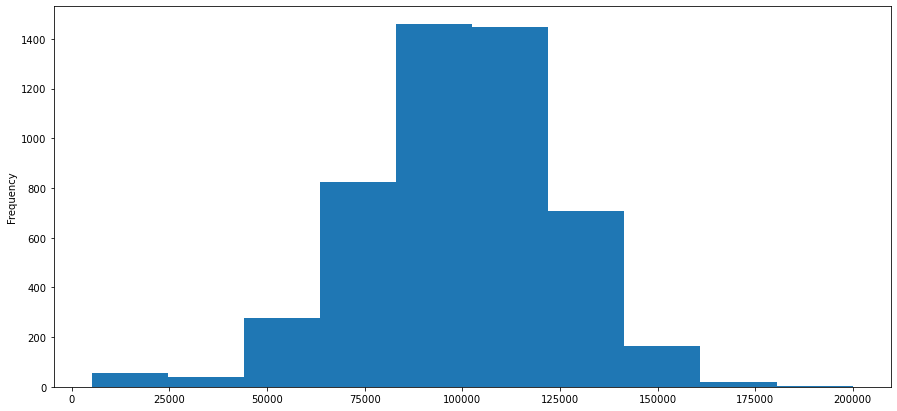

In [5]:
# histplot for target variable salary between 5089 to 199971
df['Salary'].plot.hist(figsize=(15,7))

<AxesSubplot:ylabel='Frequency'>

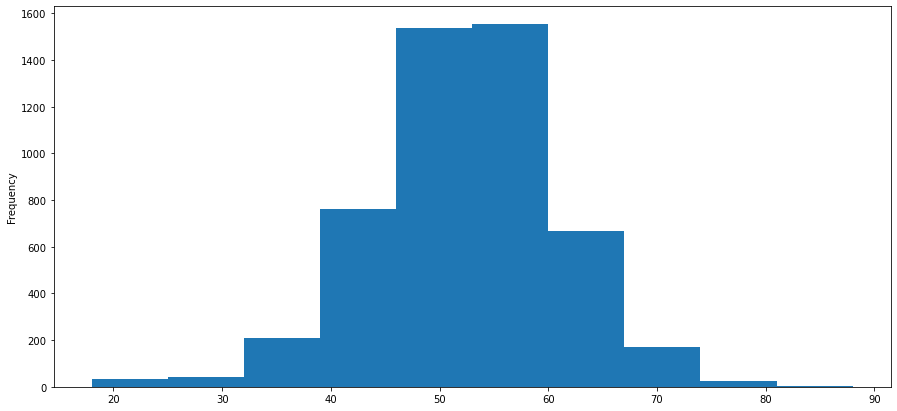

In [7]:
# histplot for Age between 18 to 88
df['Age'].plot.hist(figsize=(15,7))

<AxesSubplot:ylabel='Frequency'>

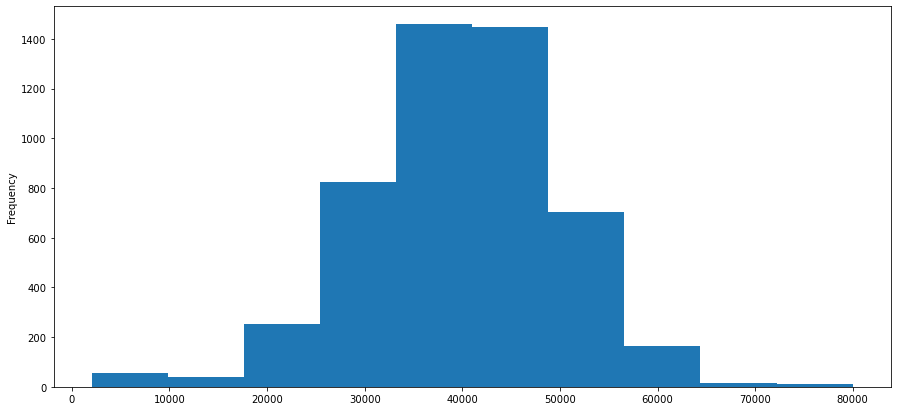

In [8]:
# histplot for Base pay 1396 to 79988
df['Base_pay'].plot.hist(figsize=(15,7))

<AxesSubplot:ylabel='Frequency'>

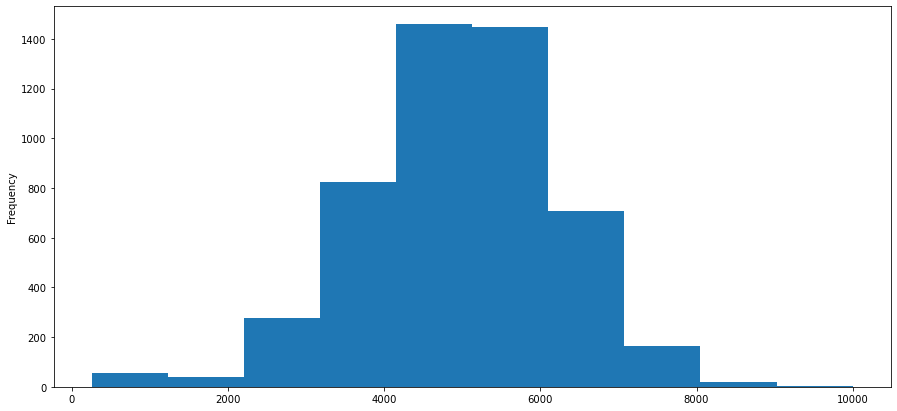

In [9]:
# histplot for Bonus 254 to 9999
df['Bonus'].plot.hist(figsize=(15,7))

# Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

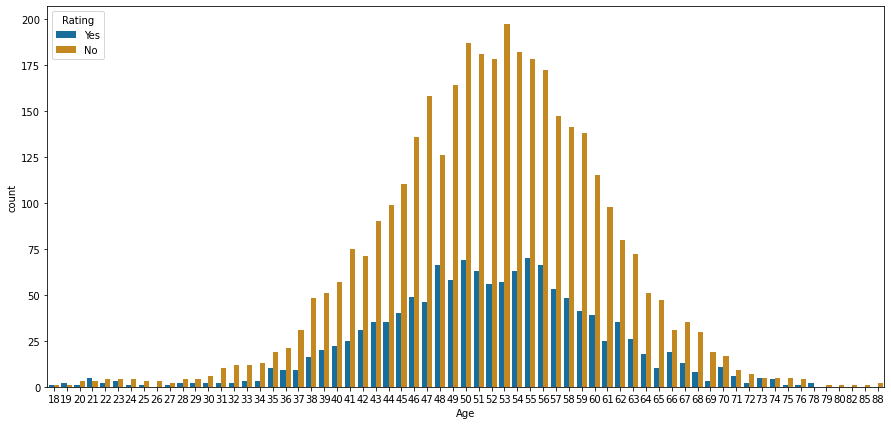

In [5]:
# plotting a graph to know relationship between Age and Rating
plt.subplots(figsize=(15,7))
sns.countplot(x='Age', hue='Rating', data=df, palette='colorblind')

Age from 48 to 56 most of the people are given a rating by a superior

<AxesSubplot:xlabel='Age', ylabel='count'>

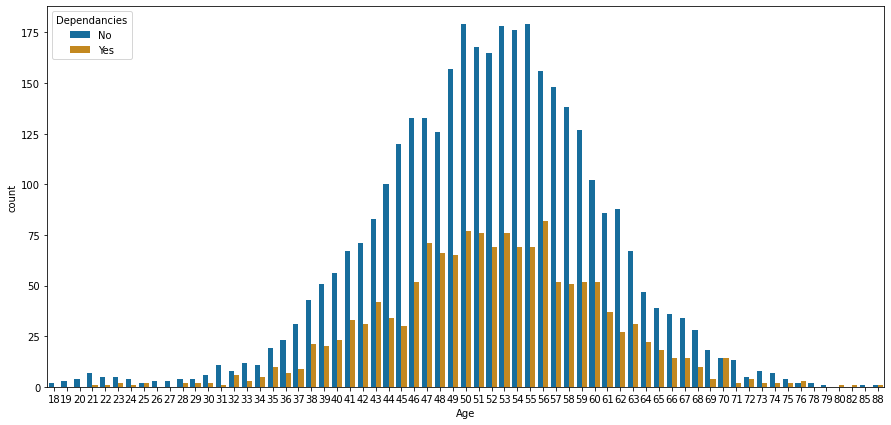

In [35]:
# plotting a graph to know relationship between Age and Dependancies
plt.subplots(figsize=(15,7))
sns.countplot(x='Age', hue='Dependancies', data=df, palette='colorblind')

Age from 47 to 56 most of the people are having dependancies

<AxesSubplot:xlabel='Age', ylabel='count'>

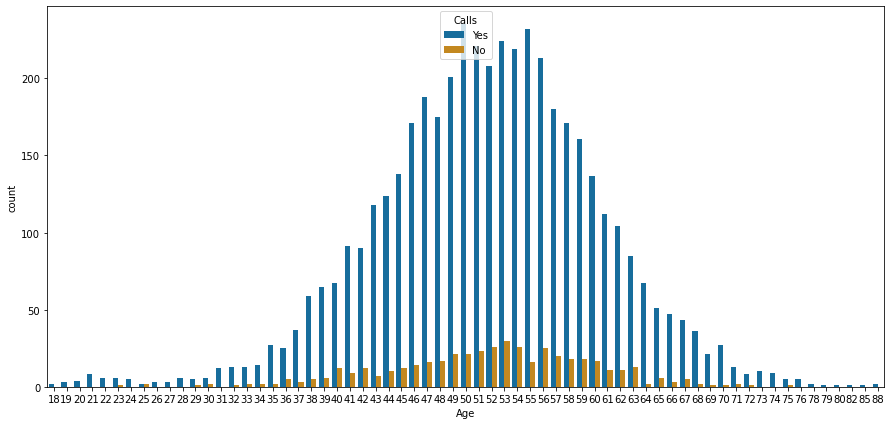

In [36]:
# plotting a graph to know relationship between Age and Calls
plt.subplots(figsize=(15,7))
sns.countplot(x='Age', hue='Calls', data=df, palette='colorblind')

Most of the people from age group 50 to 55 are having authority to make calls

<AxesSubplot:xlabel='Age', ylabel='count'>

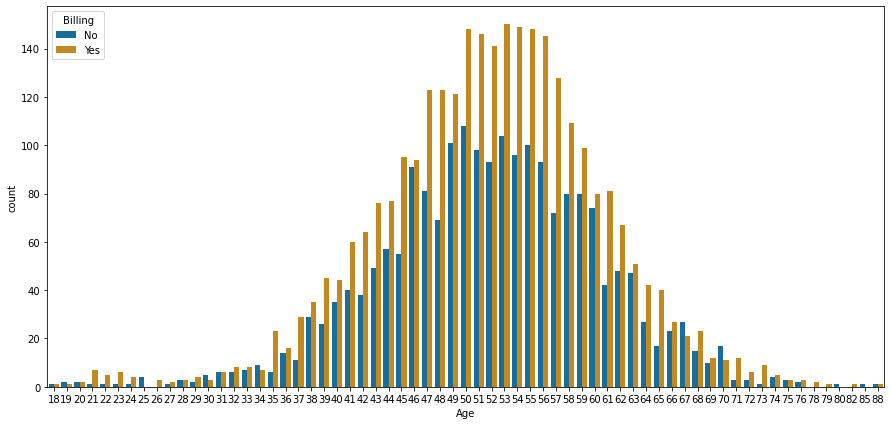

In [37]:
# plotting a graph to know relationship between Age and Billing
plt.subplots(figsize=(15,7))
sns.countplot(x='Age', hue='Billing', data=df, palette='colorblind')

From the age 50 to 57 most of them are Subscribed to billing plans

<Figure size 720x216 with 0 Axes>

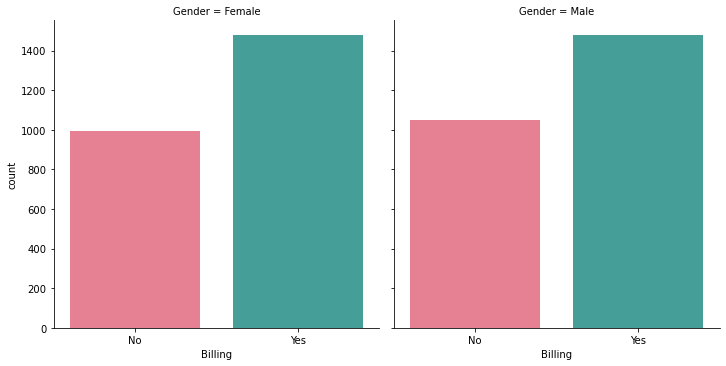

In [15]:
# visualize count of gender whether subscribe to billing plans yes or no
plt.figure(figsize=(10, 3))
sns.catplot(x='Billing', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

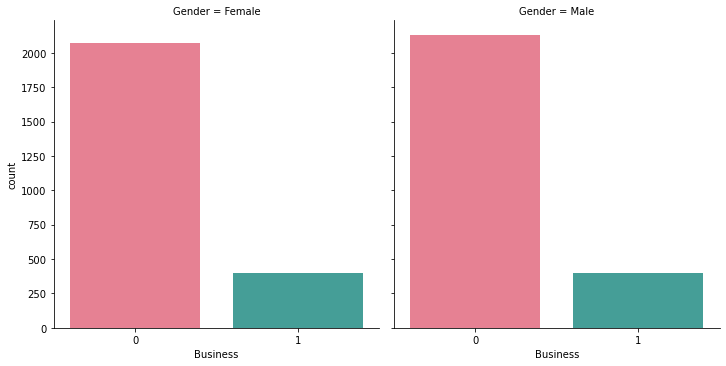

In [16]:
# visualize count of gender whether having business or no
plt.figure(figsize=(10, 3))
sns.catplot(x='Business', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

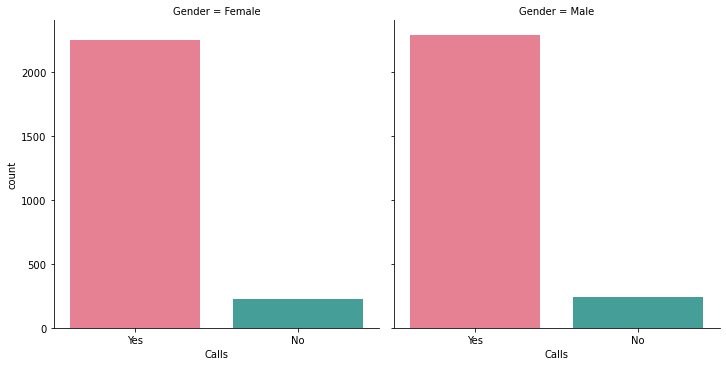

In [17]:
# visualize count of gender whether has authority to make calls or not
plt.figure(figsize=(10, 3))
sns.catplot(x='Calls', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

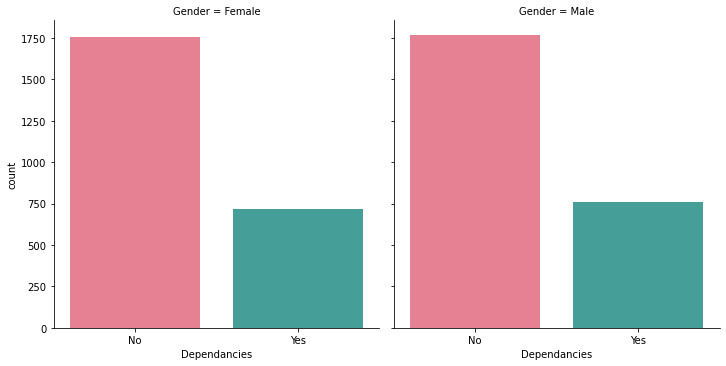

In [18]:
# visualize count of gender to know number of the people dependant on the employee
plt.figure(figsize=(10, 3))
sns.catplot(x='Dependancies', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

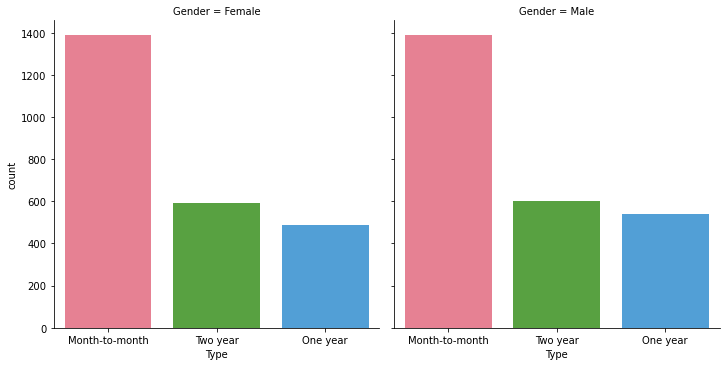

In [19]:
# visualize count of gender to know the employee salary settlement type
plt.figure(figsize=(10, 3))
sns.catplot(x='Type', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

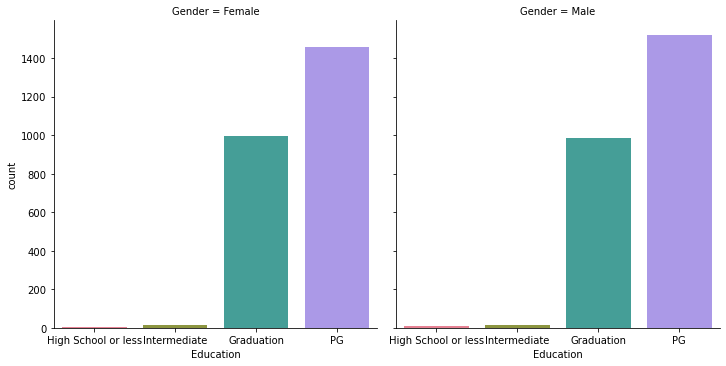

In [20]:
# visualize count of gender to know Educational back ground of an employee
plt.figure(figsize=(10, 3))
sns.catplot(x='Education', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<Figure size 720x216 with 0 Axes>

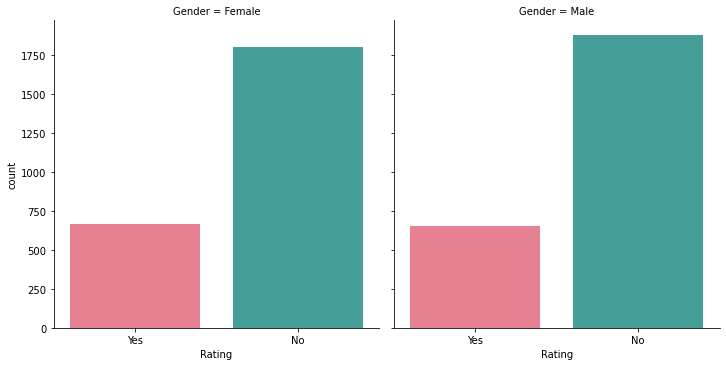

In [38]:
# visualize count of gender to know whether Rating has been given by a superior or no
plt.figure(figsize=(10, 3))
sns.catplot(x='Rating', col='Gender', kind='count', data=df,palette="husl");
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

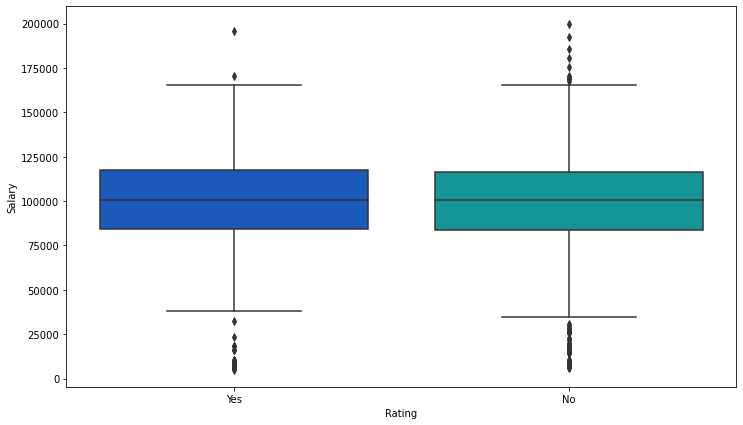

In [21]:
# box plot to check outliers for Rating based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Rating',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

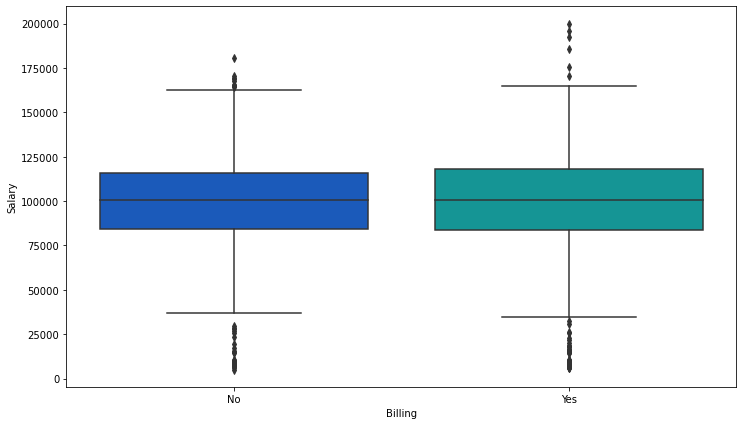

In [22]:
# box plot to check outliers for Billing based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Billing',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Business', ylabel='Salary'>

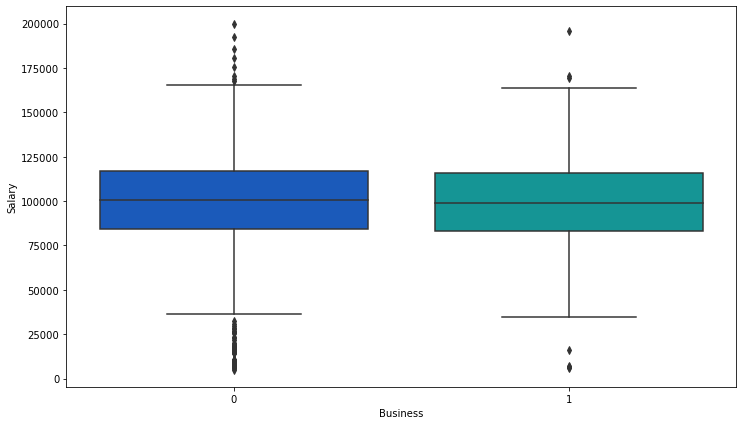

In [23]:
# box plot to check outliers for Business based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Business',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Dependancies', ylabel='Salary'>

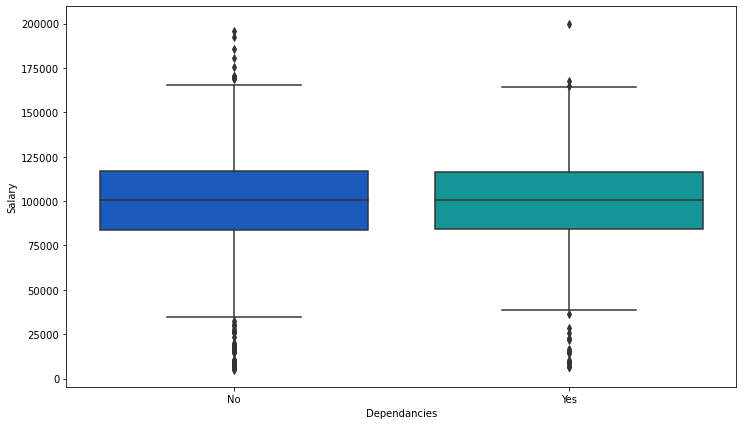

In [24]:
# box plot to check outliers for Dependancies based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Dependancies',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

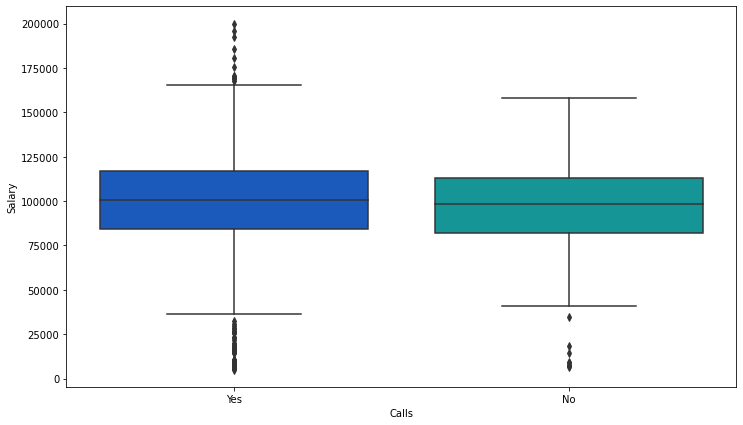

In [25]:
# box plot to check outliers for Calls based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Calls',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Type', ylabel='Salary'>

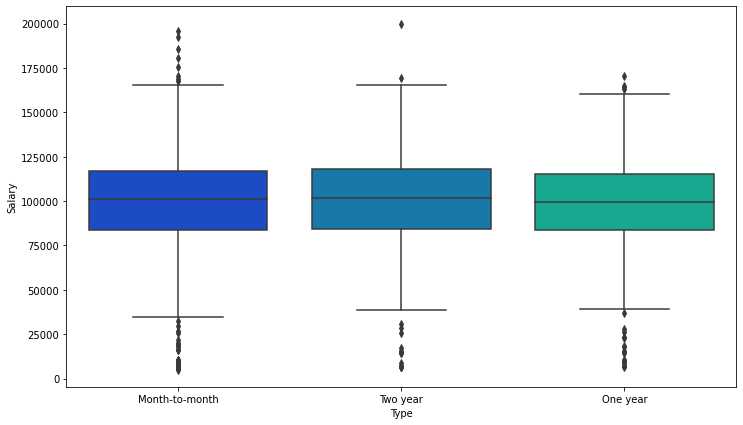

In [26]:
# box plot to check outliers for Type based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Type',y='Salary', data=df, palette = 'winter')

<AxesSubplot:xlabel='Education', ylabel='Salary'>

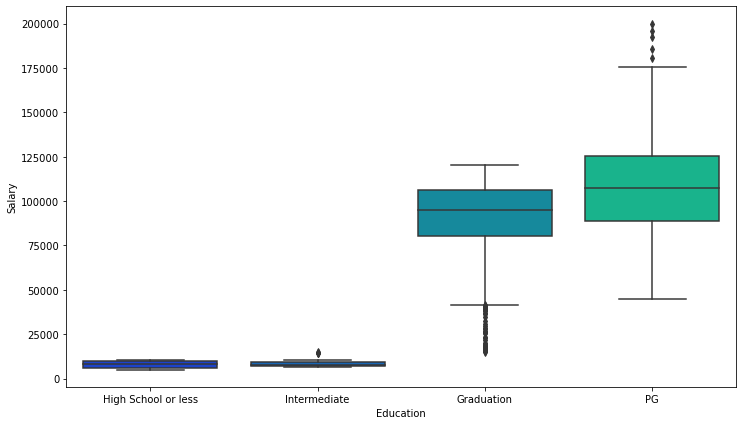

In [27]:
# box plot to check outliers for Education based on target variable
plt.subplots(figsize=(12,7))
sns.boxplot(x='Education',y='Salary', data=df, palette = 'winter')

Handling categorical data for model creation

Nominal data: data are not in any order - 'OneHotEncoder' is used in this case
Ordinal data: data are in order - 'LabelEncoder' is used in this case

In [27]:
# Gender is Nominal Categorical data so apply OneHotEncoding
Gender = df[['Gender']]
Gender = pd.get_dummies(Gender, drop_first = True)
Gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,1


In [28]:
# Dependancies is Nominal Categorical data so apply OneHotEncoding
Dependancies = df[['Dependancies']]
Dependancies = pd.get_dummies(Dependancies, drop_first = True)
Dependancies.head()

,Dependancies_Yes
0,0
1,0
2,0
3,0
4,0


In [29]:
# Calls column is Nominal Categorical data so apply OneHotEncoding
Calls = df[['Calls']]
Calls = pd.get_dummies(Calls, drop_first = True)
Calls.head()

,Calls_Yes
0,1
1,1
2,1
3,1
4,1


In [30]:
# Billing is Nominal Categorical data so apply OneHotEncoding
Billing = df[['Billing']]
Billing = pd.get_dummies(Billing, drop_first = True)
Billing.head()

,Billing_Yes
0,0
1,0
2,1
3,1
4,1


In [31]:
# Rating is Nominal Categorical data so apply OneHotEncoding
Rating = df[['Rating']]
Rating = pd.get_dummies(Rating, drop_first = True)
Rating.head()

,Rating_Yes
0,1
1,1
2,0
3,1
4,1


In [32]:
# As these columns Type and Education are Oridnal categorical type so apply LabelEncoder
df = df.replace({'Month-to-month':0, 'One year':1, 'Two year':2})
df = df.replace({'High School or less':0, 'Intermediate':1, 'Graduation':2, 'PG':3})
# load the data set head columns
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Months,Education,openingbalance_median,Base_pay_median,Total_Sales_median
0,Female,0,No,Yes,0,No,Yes,18,5089.00,254.4500,3.77,21226600,3.76,3.65,18.25,0,0,3.75,2035.600,18.80
1,Female,0,No,Yes,0,No,Yes,19,5698.12,284.9060,3.74,10462800,3.68,3.65,18.40,0,0,3.85,2279.248,18.85
2,Male,0,No,Yes,0,Yes,No,22,5896.65,294.8325,3.89,18761000,4.29,3.72,18.70,0,0,4.23,2358.660,18.90
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,306.2560,4.35,66130600,4.31,3.83,18.75,0,0,4.26,2450.048,19.00
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,312.2500,4.34,26868200,4.41,4.08,18.80,1,0,4.79,2498.000,19.05


In [33]:
# Concatenate dataframe - df and Gender, Dependancies, Calls, Billing, Rating columns
df_train = pd.concat([df, Gender, Dependancies, Calls, Billing, Rating], axis = 1)

In [34]:
# check the data set head columns
df_train.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Bonus,...,Months,Education,openingbalance_median,Base_pay_median,Total_Sales_median,Gender_Male,Dependancies_Yes,Calls_Yes,Billing_Yes,Rating_Yes
0,Female,0,No,Yes,0,No,Yes,18,5089.00,254.4500,...,0,0,3.75,2035.600,18.80,0,0,1,0,1
1,Female,0,No,Yes,0,No,Yes,19,5698.12,284.9060,...,0,0,3.85,2279.248,18.85,0,0,1,0,1
2,Male,0,No,Yes,0,Yes,No,22,5896.65,294.8325,...,0,0,4.23,2358.660,18.90,1,0,1,1,0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,306.2560,...,0,0,4.26,2450.048,19.00,0,0,1,1,1
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,312.2500,...,1,0,4.79,2498.000,19.05,1,0,1,1,1


In [35]:
# dropping columns from the data set
df_train.drop(['Gender','Dependancies','Calls', 'Billing','Rating'], axis=1, inplace=True)

In [36]:
# load the data set head columns
df_train.head()

,Business,Type,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Months,Education,openingbalance_median,Base_pay_median,Total_Sales_median,Gender_Male,Dependancies_Yes,Calls_Yes,Billing_Yes,Rating_Yes
0,0,0,18,5089.00,254.4500,3.77,21226600,3.76,3.65,18.25,0,0,3.75,2035.600,18.80,0,0,1,0,1
1,0,0,19,5698.12,284.9060,3.74,10462800,3.68,3.65,18.40,0,0,3.85,2279.248,18.85,0,0,1,0,1
2,0,0,22,5896.65,294.8325,3.89,18761000,4.29,3.72,18.70,0,0,4.23,2358.660,18.90,1,0,1,1,0
3,1,0,21,6125.12,306.2560,4.35,66130600,4.31,3.83,18.75,0,0,4.26,2450.048,19.00,0,0,1,1,1
4,0,0,23,6245.00,312.2500,4.34,26868200,4.41,4.08,18.80,1,0,4.79,2498.000,19.05,1,0,1,1,1


# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. 
Following are some of the feature selection methods,

Heatmap

Feature importance

In [37]:
# check the number of rows and columns of the data set
df_train.shape

(5000, 20)

In [38]:
# get the data set columns
df_train.columns

Index(['Business', 'Type', 'Age', 'Salary', 'Bonus', 'Unit_Price', 'Volume',
       'closingbalance', 'low', 'Unit_Sales', 'Months', 'Education',
       'openingbalance_median', 'Base_pay_median', 'Total_Sales_median',
       'Gender_Male', 'Dependancies_Yes', 'Calls_Yes', 'Billing_Yes',
       'Rating_Yes'],
      dtype='object')

In [39]:
X = df_train.loc[:, ['Business', 'Type', 'Age', 'Bonus', 'Unit_Price',
       'closingbalance', 'low', 'Unit_Sales', 'Months', 'Education',
       'openingbalance_median', 'Base_pay_median', 'Total_Sales_median',
       'Gender_Male', 'Dependancies_Yes', 'Calls_Yes', 'Billing_Yes',
       'Rating_Yes']]
X.head()

,Business,Type,Age,Bonus,Unit_Price,closingbalance,low,Unit_Sales,Months,Education,openingbalance_median,Base_pay_median,Total_Sales_median,Gender_Male,Dependancies_Yes,Calls_Yes,Billing_Yes,Rating_Yes
0,0,0,18,254.4500,3.77,3.76,3.65,18.25,0,0,3.75,2035.600,18.80,0,0,1,0,1
1,0,0,19,284.9060,3.74,3.68,3.65,18.40,0,0,3.85,2279.248,18.85,0,0,1,0,1
2,0,0,22,294.8325,3.89,4.29,3.72,18.70,0,0,4.23,2358.660,18.90,1,0,1,1,0
3,1,0,21,306.2560,4.35,4.31,3.83,18.75,0,0,4.26,2450.048,19.00,0,0,1,1,1
4,0,0,23,312.2500,4.34,4.41,4.08,18.80,1,0,4.79,2498.000,19.05,1,0,1,1,1


In [41]:
y = df_train.iloc[:, 3]
y.head()

0    5089.00
1    5698.12
2    5896.65
3    6125.12
4    6245.00
Name: Salary, dtype: float64

In [42]:
# get the correlation of the data set
df.corr()

,Business,Type,Age,Salary,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Months,Education,openingbalance_median,Base_pay_median,Total_Sales_median
Business,1.000000,-0.143306,-0.005736,-0.008333,-0.008333,0.002512,0.018296,0.005888,0.000226,-0.018623,-0.011645,-0.014520,-0.023798,-0.007844,-0.018338
Type,-0.143306,1.000000,0.000853,0.009414,0.009414,0.007779,0.008719,-0.010694,0.005791,0.012784,0.001767,0.010226,0.019787,0.010249,0.011856
Age,-0.005736,0.000853,1.000000,0.288743,0.288743,0.191133,-0.036265,0.294936,0.253885,0.186905,0.129768,0.131279,0.092729,0.291721,0.143351
Salary,-0.008333,0.009414,0.288743,1.000000,1.000000,0.596259,-0.207246,0.316732,0.811943,0.940854,0.606865,0.375752,0.731291,0.992200,0.879311
Bonus,-0.008333,0.009414,0.288743,1.000000,1.000000,0.596259,-0.207246,0.316732,0.811943,0.940854,0.606865,0.375752,0.731291,0.992200,0.879311
Unit_Price,0.002512,0.007779,0.191133,0.596259,0.596259,1.000000,-0.045986,0.332721,0.832543,0.521937,0.445347,0.238875,0.491244,0.589497,0.598798
Volume,0.018296,0.008719,-0.036265,-0.207246,-0.207246,-0.045986,1.000000,-0.063188,-0.146219,-0.215776,-0.124170,-0.077910,-0.149340,-0.201964,-0.183335
closingbalance,0.005888,-0.010694,0.294936,0.316732,0.316732,0.332721,-0.063188,1.000000,0.382555,0.237685,0.293089,0.098670,0.012393,0.316329,0.231808
low,0.000226,0.005791,0.253885,0.811943,0.811943,0.832543,-0.146219,0.382555,1.000000,0.749458,0.610039,0.320857,0.700927,0.803615,0.853233
Unit_Sales,-0.018623,0.012784,0.186905,0.940854,0.940854,0.521937,-0.215776,0.237685,0.749458,1.000000,0.487154,0.295475,0.740190,0.930313,0.891793


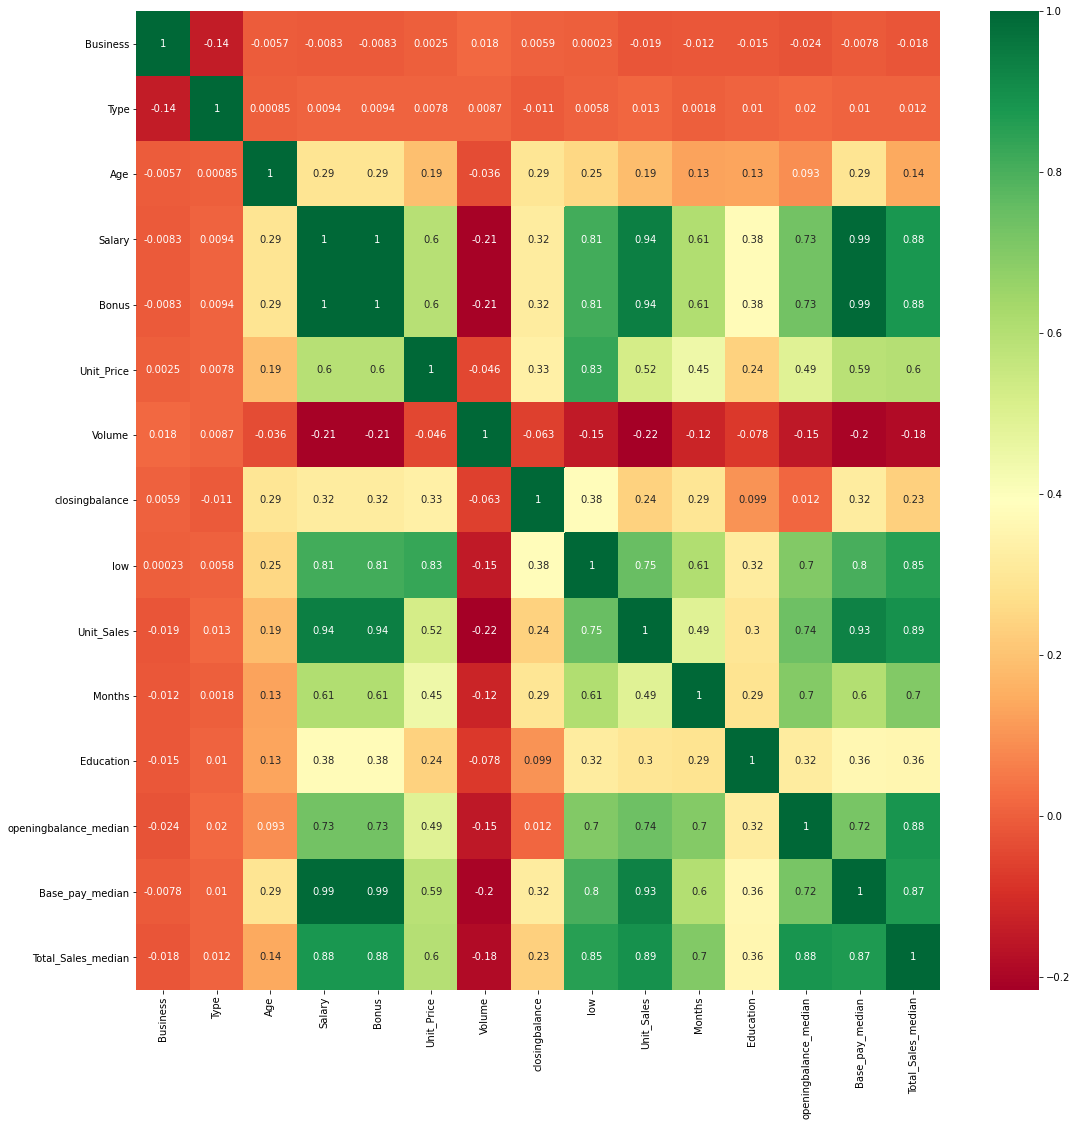

In [55]:
# Find the correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

From the above heatmap we can say the correlation is positive. There is positive correlation between target variable and independent variables.

In [51]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[5.61004696e-07 2.07870763e-06 5.42417883e-03 1.35365318e-01
 2.33565394e-03 7.77842311e-03 9.58196948e-02 3.44833043e-01
 4.40867693e-02 3.68168118e-04 1.42078257e-01 1.01826926e-01
 1.20074337e-01 1.59891718e-06 1.94692493e-06 2.16458214e-07
 2.06652039e-06 7.62957570e-07]


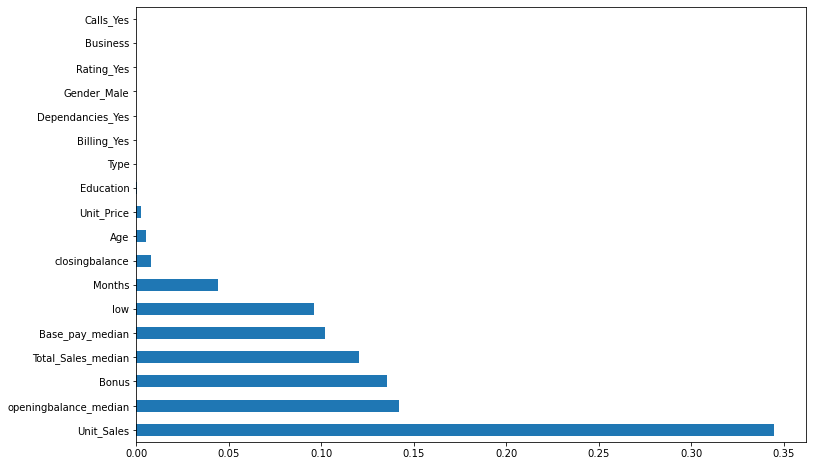

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feature_importances = pd.Series(selection.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

1. Split dataset into train and test set 
2. Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict X_test
6. Check RSME Score
7. Plot graph

In [54]:
# importing train test split
from sklearn.model_selection import train_test_split

In [55]:
# splitting of data set into train and test for algorithm
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [56]:
X_train.shape

(4000, 18)

In [57]:
X_test.shape

(1000, 18)

In [58]:
y_train.shape

(4000,)

In [59]:
y_test.shape

(1000,)

In [60]:
# importing RandomForestRegressor model algorithm
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

# model fitting & training
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
# prediction
y_pred = reg_rf.predict(X_test)

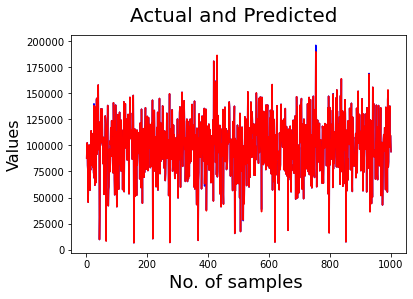

In [62]:
# Comparing true and predicted value using plot
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure()
#Plotting Actual
plt.plot(c,y_test, color = 'blue', linewidth = 1.5, linestyle = "-")
#Plotting predicted
plt.plot(c, y_pred, color = 'red', linewidth = 1.5, linestyle = "-")
# Plot heading 
fig.suptitle('Actual and Predicted', fontsize = 20)
# X-label
plt.xlabel('No. of samples ', fontsize = 18)
# Y-label
plt.ylabel('Values', fontsize = 16)
#showing the plot
plt.show()

In [63]:
# train accuracy
reg_rf.score(X_train, y_train)

0.9999561532040124

In [64]:
# test accuracy
reg_rf.score(X_test, y_test)

0.9999128901341228

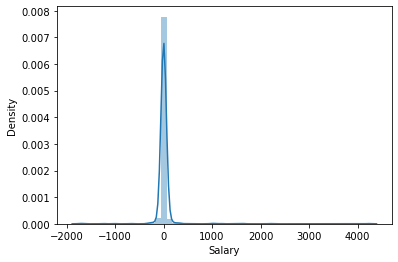

In [77]:
# density plot for actual & prediction
sns.distplot(y_test-y_pred)
plt.show()

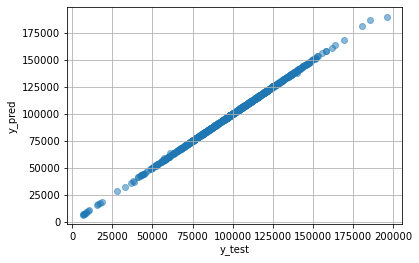

In [67]:
# scatter plot for actual & prediction
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid(True)
plt.show()

In [65]:
# importing metrics library
from sklearn import metrics

In [66]:
# checking MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 38.93600143255013
MSE: 60395.773459670556
RMSE: 245.75551562410672


Random Forest works for both Classification and Regression tasks.

Handles large datasets with high dimensionality.

Enhances the accuracy of the model and prevents the overfitting problem.